<a href="https://colab.research.google.com/github/sysyJEON/class_ai4ml/blob/main/ml_guide/ch10_Visualization_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오피스텔 월세 가격 시각화

데이터: 한국부동산원_오피스텔 가격동향조사_월세가격(지역별)

한국부동산원(구.한국감정원)에서 제공하는 오피스텔 가격동향조사의 지역별 월세가격 데이터입니다.
- (단위 : 천원)
- 공표시기 : 조사 다음달 15일(휴일인 경우 그 다음날)
- 2020-07 ~ 2023-12 데이터

https://www.data.go.kr/data/15048312/fileData.do

## 데이터 불러오기

구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CSV 파일 읽기

In [2]:
import pandas as pd

# Try reading the file with a different encoding, such as 'cp949' or 'euc-kr'
try:
  rent_df = pd.read_csv('/content/drive/MyDrive/데이터/rent_officetel.csv', encoding='cp949')
except UnicodeDecodeError:
  rent_df = pd.read_csv('/content/drive/MyDrive/데이터/rent_officetel.csv', encoding='euc-kr')

rent_df.head(5)

,지역,2020-07(평균월세보증금),2020-07(평균월세가격),2020-07(중위월세보증금),2020-07(중위월세가격),2020-08(평균월세보증금),2020-08(평균월세가격),2020-08(중위월세보증금),2020-08(중위월세가격),2020-09(평균월세보증금),...,2023-10(중위월세보증금),2023-10(중위월세가격),2023-11(평균월세보증금),2023-11(평균월세가격),2023-11(중위월세보증금),2023-11(중위월세가격),2023-12(평균월세보증금),2023-12(평균월세가격),2023-12(중위월세보증금),2023-12(중위월세가격)
0,전국,13107,661,10705,634,13101,661,10705,635,13103,...,10834,656,13455,686,10834,656,13472,687,10834,656
1,수도권,13656,698,11247,668,13649,698,11247,670,13652,...,11406,692,14166,728,11406,693,14178,728,11406,693
2,지방,10837,507,8466,492,10837,507,8466,492,10837,...,8472,504,10515,513,8472,504,10554,513,8472,503
3,서울,15250,777,12876,744,15255,778,12876,744,15262,...,12873,763,15828,798,12873,762,15854,798,12873,763
4,서울 도심권,13906,946,13701,919,13906,946,13701,919,13906,...,13701,946,13950,981,13701,946,13950,983,13701,946


In [3]:
rent_df.set_index('지역', inplace=True)

## 데이터 프레임 조정


### 평균 데이터

In [4]:
# 평균 보증금 데이터만
mean_deposit = rent_df.loc[:, rent_df.columns.str.contains('평균월세보증금')]
mean_deposit.head(5)

,2020-07(평균월세보증금),2020-08(평균월세보증금),2020-09(평균월세보증금),2020-10(평균월세보증금),2020-11(평균월세보증금),2020-12(평균월세보증금),2021-01(평균월세보증금),2021-02(평균월세보증금),2021-03(평균월세보증금),2021-04(평균월세보증금),...,2023-03(평균월세보증금),2023-04(평균월세보증금),2023-05(평균월세보증금),2023-06(평균월세보증금),2023-07(평균월세보증금),2023-08(평균월세보증금),2023-09(평균월세보증금),2023-10(평균월세보증금),2023-11(평균월세보증금),2023-12(평균월세보증금)
지역,,,,,,,,,,,,,,,,,,,,,
전국,13107,13101,13103,13126,13129,13136,13148,13203,13282,13267,...,13479,13502,13525,13650,13643,13658,13648,13644,13455,13472
수도권,13656,13649,13652,13637,13637,13641,13662,13729,13819,13870,...,14161,14198,14229,14387,14392,14392,14383,14387,14166,14178
지방,10837,10837,10837,11018,11025,11047,11025,11032,11064,10776,...,10660,10624,10616,10603,10550,10627,10611,10576,10515,10554
서울,15250,15255,15262,15265,15259,15274,15310,15362,15381,15639,...,15770,15832,15830,15830,15828,15828,15829,15829,15828,15854
서울 도심권,13906,13906,13906,13906,13906,13906,13952,13952,13952,13952,...,13965,13950,13942,13940,13940,13940,13950,13950,13950,13950


In [5]:
# 원하는 형식의 평균 보증금 데이터 프레임 생성
mean_deposit_data=[]
for col in mean_deposit.columns:
  year_month = col.split('(')[0]
  year, month = year_month.split('-')

  for region, value in zip(mean_deposit.index, mean_deposit[col]):
    mean_deposit_data.append({'지역': region, '연도': int(year), '월':int(month), '평균 보증금': value})

mean_deposit_df = pd.DataFrame(mean_deposit_data)
mean_deposit_df

,지역,연도,월,평균 보증금
0,전국,2020,7,13107
1,수도권,2020,7,13656
2,지방,2020,7,10837
3,서울,2020,7,15250
4,서울 도심권,2020,7,13906
...,...,...,...,...
709,광주,2023,12,6257
710,대전,2023,12,9787
711,울산,2023,12,10844
712,세종,2023,12,4198


In [6]:
# 평균 월세 가격 데이터만
mean_price = rent_df.loc[:, rent_df.columns.str.contains('평균월세가격')]
mean_price.head(5)

,2020-07(평균월세가격),2020-08(평균월세가격),2020-09(평균월세가격),2020-10(평균월세가격),2020-11(평균월세가격),2020-12(평균월세가격),2021-01(평균월세가격),2021-02(평균월세가격),2021-03(평균월세가격),2021-04(평균월세가격),...,2023-03(평균월세가격),2023-04(평균월세가격),2023-05(평균월세가격),2023-06(평균월세가격),2023-07(평균월세가격),2023-08(평균월세가격),2023-09(평균월세가격),2023-10(평균월세가격),2023-11(평균월세가격),2023-12(평균월세가격)
지역,,,,,,,,,,,,,,,,,,,,,
전국,661,661,661,662,662,663,664,664,665,665,...,682,683,683,683,683,684,684,685,686,687
수도권,698,698,699,700,700,701,702,703,703,703,...,723,724,724,724,725,725,726,726,728,728
지방,507,507,507,506,506,506,506,507,507,508,...,514,514,513,513,513,512,513,513,513,513
서울,777,778,778,778,778,778,779,779,779,778,...,794,795,796,797,797,797,798,798,798,798
서울 도심권,946,946,946,945,945,945,945,945,945,945,...,973,976,977,977,978,978,979,980,981,983


In [7]:
# 원하는 형식의 평균 월세 가격 데이터 프레임 생성
mean_price_data=[]
for col in mean_price.columns:
  year_month = col.split('(')[0]
  year, month = year_month.split('-')

  for region, value in zip(mean_price.index, mean_price[col]):
    mean_price_data.append({'지역': region, '연도': int(year), '월':int(month), '평균 월세': value})

mean_price_df = pd.DataFrame(mean_price_data)
mean_price_df

,지역,연도,월,평균 월세
0,전국,2020,7,661
1,수도권,2020,7,698
2,지방,2020,7,507
3,서울,2020,7,777
4,서울 도심권,2020,7,946
...,...,...,...,...
709,광주,2023,12,418
710,대전,2023,12,467
711,울산,2023,12,484
712,세종,2023,12,419


In [8]:
# 평균 보증금, 가격 데이터프레임 합치기
mean_df = pd.merge(mean_deposit_df, mean_price_df, on=['지역', '연도', '월'])
mean_df

,지역,연도,월,평균 보증금,평균 월세
0,전국,2020,7,13107,661
1,수도권,2020,7,13656,698
2,지방,2020,7,10837,507
3,서울,2020,7,15250,777
4,서울 도심권,2020,7,13906,946
...,...,...,...,...,...
709,광주,2023,12,6257,418
710,대전,2023,12,9787,467
711,울산,2023,12,10844,484
712,세종,2023,12,4198,419


### 중위수 데이터

In [9]:
# 중위 보증금 데이터만
median_deposit = rent_df.loc[:, rent_df.columns.str.contains('중위월세보증금')]
median_deposit.head(5)

,2020-07(중위월세보증금),2020-08(중위월세보증금),2020-09(중위월세보증금),2020-10(중위월세보증금),2020-11(중위월세보증금),2020-12(중위월세보증금),2021-01(중위월세보증금),2021-02(중위월세보증금),2021-03(중위월세보증금),2021-04(중위월세보증금),...,2023-03(중위월세보증금),2023-04(중위월세보증금),2023-05(중위월세보증금),2023-06(중위월세보증금),2023-07(중위월세보증금),2023-08(중위월세보증금),2023-09(중위월세보증금),2023-10(중위월세보증금),2023-11(중위월세보증금),2023-12(중위월세보증금)
지역,,,,,,,,,,,,,,,,,,,,,
전국,10705,10705,10705,10705,10705,10710,10707,10707,10711,10712,...,10841,10841,10836,10836,10834,10834,10834,10834,10834,10834
수도권,11247,11247,11247,11247,11247,11247,11247,11247,11247,11247,...,11406,11406,11404,11404,11406,11406,11406,11406,11406,11406
지방,8466,8466,8466,8466,8466,8490,8475,8475,8499,8499,...,8508,8508,8490,8486,8472,8472,8472,8472,8472,8472
서울,12876,12876,12876,12876,12876,12876,12876,12876,12876,12877,...,12873,12873,12873,12873,12873,12873,12873,12873,12873,12873
서울 도심권,13701,13701,13701,13701,13701,13701,13701,13701,13701,13701,...,13701,13701,13701,13701,13701,13701,13701,13701,13701,13701


In [10]:
# 원하는 형식의 평균 보증금 데이터 프레임 생성
median_deposit_data=[]
for col in median_deposit.columns:
  year_month = col.split('(')[0]
  year, month = year_month.split('-')

  for region, value in zip(median_deposit.index, median_deposit[col]):
    median_deposit_data.append({'지역': region, '연도': int(year), '월':int(month), '중위 보증금': value})

median_deposit_df = pd.DataFrame(median_deposit_data)
median_deposit_df

,지역,연도,월,중위 보증금
0,전국,2020,7,10705
1,수도권,2020,7,11247
2,지방,2020,7,8466
3,서울,2020,7,12876
4,서울 도심권,2020,7,13701
...,...,...,...,...
709,광주,2023,12,5416
710,대전,2023,12,9402
711,울산,2023,12,8412
712,세종,2023,12,4198


In [11]:
# 중위 월세 가격 데이터만
median_price = rent_df.loc[:, rent_df.columns.str.contains('중위월세가격')]
median_price.head(5)

,2020-07(중위월세가격),2020-08(중위월세가격),2020-09(중위월세가격),2020-10(중위월세가격),2020-11(중위월세가격),2020-12(중위월세가격),2021-01(중위월세가격),2021-02(중위월세가격),2021-03(중위월세가격),2021-04(중위월세가격),...,2023-03(중위월세가격),2023-04(중위월세가격),2023-05(중위월세가격),2023-06(중위월세가격),2023-07(중위월세가격),2023-08(중위월세가격),2023-09(중위월세가격),2023-10(중위월세가격),2023-11(중위월세가격),2023-12(중위월세가격)
지역,,,,,,,,,,,,,,,,,,,,,
전국,634,635,635,636,636,636,637,637,637,639,...,657,655,655,655,654,655,655,656,656,656
수도권,668,670,670,671,671,671,672,672,672,675,...,694,691,691,691,691,691,692,692,693,693
지방,492,492,492,490,490,491,492,493,493,493,...,506,507,506,505,504,504,504,504,504,503
서울,744,744,744,744,744,743,743,744,744,745,...,760,761,761,761,761,762,763,763,762,763
서울 도심권,919,919,919,912,912,912,912,913,913,913,...,930,948,942,941,942,941,944,946,946,946


In [12]:
# 원하는 형식의 평균 보증금 데이터 프레임 생성
median_price_data=[]
for col in median_price.columns:
  year_month = col.split('(')[0]
  year, month = year_month.split('-')

  for region, value in zip(median_price.index, median_price[col]):
    median_price_data.append({'지역': region, '연도': int(year), '월':int(month), '중위 월세': value})

median_price_df = pd.DataFrame(median_price_data)
median_price_df

,지역,연도,월,중위 월세
0,전국,2020,7,634
1,수도권,2020,7,668
2,지방,2020,7,492
3,서울,2020,7,744
4,서울 도심권,2020,7,919
...,...,...,...,...
709,광주,2023,12,422
710,대전,2023,12,465
711,울산,2023,12,485
712,세종,2023,12,419


In [13]:
# 중위 보증금, 가격 데이터프레임 합치기
median_df = pd.merge(median_deposit_df, median_price_df, on=['지역', '연도', '월'])
median_df

,지역,연도,월,중위 보증금,중위 월세
0,전국,2020,7,10705,634
1,수도권,2020,7,11247,668
2,지방,2020,7,8466,492
3,서울,2020,7,12876,744
4,서울 도심권,2020,7,13701,919
...,...,...,...,...,...
709,광주,2023,12,5416,422
710,대전,2023,12,9402,465
711,울산,2023,12,8412,485
712,세종,2023,12,4198,419


### 최종 데이터프레임

In [14]:
median_df = pd.merge(median_deposit_df, median_price_df, on=['지역', '연도', '월'])
median_df

,지역,연도,월,중위 보증금,중위 월세
0,전국,2020,7,10705,634
1,수도권,2020,7,11247,668
2,지방,2020,7,8466,492
3,서울,2020,7,12876,744
4,서울 도심권,2020,7,13701,919
...,...,...,...,...,...
709,광주,2023,12,5416,422
710,대전,2023,12,9402,465
711,울산,2023,12,8412,485
712,세종,2023,12,4198,419


In [15]:
df = pd.merge(mean_df, median_df, on=['지역', '연도', '월'])
df

,지역,연도,월,평균 보증금,평균 월세,중위 보증금,중위 월세
0,전국,2020,7,13107,661,10705,634
1,수도권,2020,7,13656,698,11247,668
2,지방,2020,7,10837,507,8466,492
3,서울,2020,7,15250,777,12876,744
4,서울 도심권,2020,7,13906,946,13701,919
...,...,...,...,...,...,...,...
709,광주,2023,12,6257,418,5416,422
710,대전,2023,12,9787,467,9402,465
711,울산,2023,12,10844,484,8412,485
712,세종,2023,12,4198,419,4198,419


## 시각화

참고: https://m.blog.naver.com/kurtnim/222277895911

In [16]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

### histplot

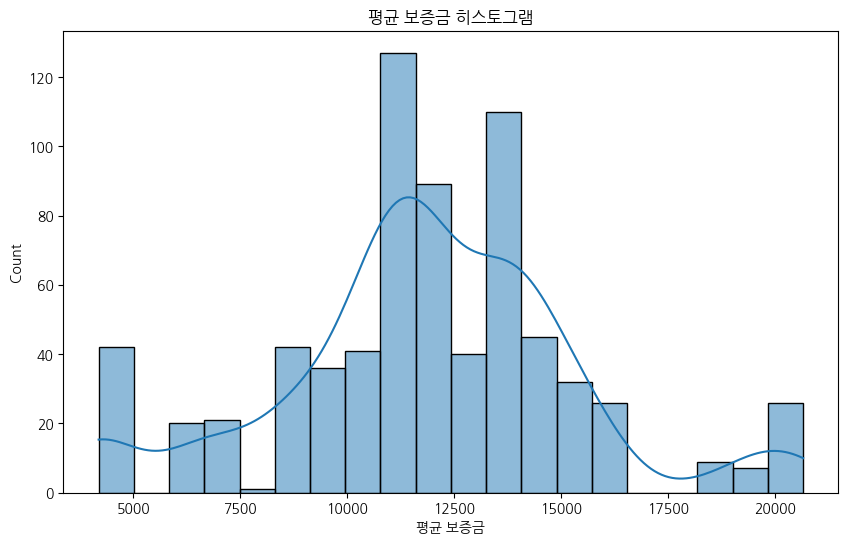

In [71]:
plt.figure(figsize=(10, 6))

sns.histplot(df['평균 보증금'], bins=20, kde=True)
plt.title('평균 보증금 히스토그램')
plt.show()

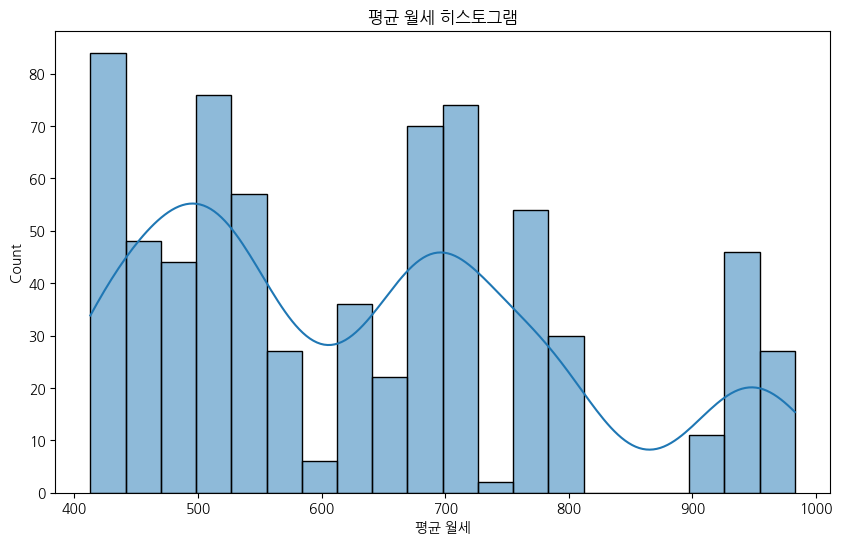

In [72]:
plt.figure(figsize=(10, 6))

sns.histplot(df['평균 월세'], bins=20, kde=True)
plt.title('평균 월세 히스토그램')
plt.show()

### barplot

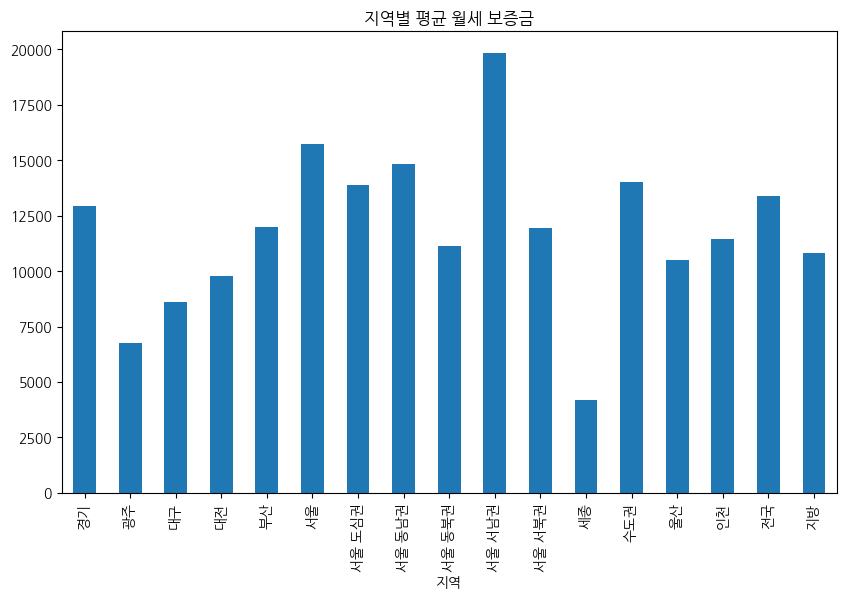

In [27]:
plt.figure(figsize=(10, 6))
df.groupby('지역')['평균 보증금'].mean().plot(kind='bar')
plt.title('지역별 평균 월세 보증금')
plt.show()

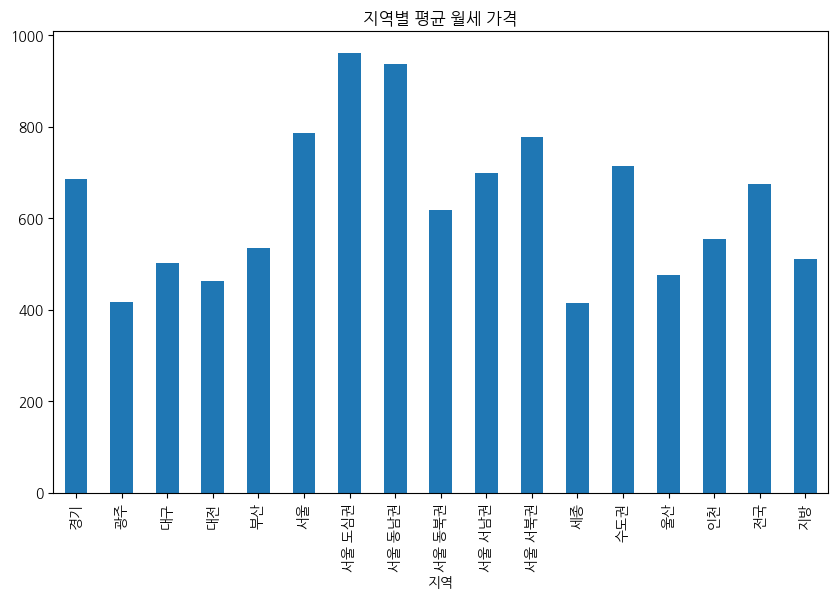

In [29]:
plt.figure(figsize=(10, 6))
df.groupby('지역')['평균 월세'].mean().plot(kind='bar')
plt.title('지역별 평균 월세 가격')
plt.show()

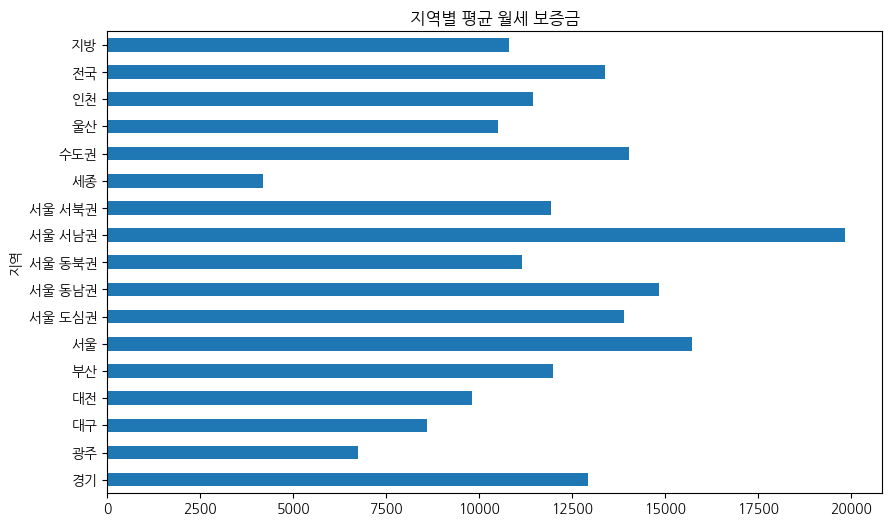

In [20]:
plt.figure(figsize=(10, 6))
df.groupby('지역')['평균 보증금'].mean().plot(kind='barh') # 수평 bar 그래프
plt.title('지역별 평균 월세 보증금')
plt.show()

subplots 이용

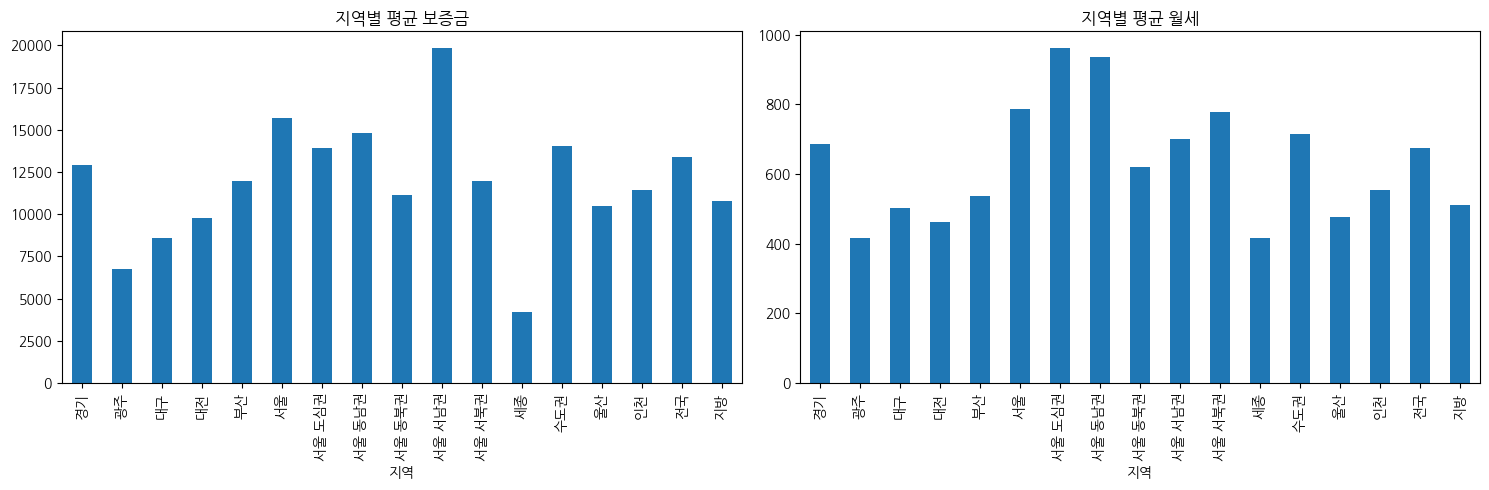

In [28]:
cat_columns = ['평균 보증금', '평균 월세']

fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(15, 5))

for index, column in enumerate(cat_columns):
  df.groupby('지역')[column].mean().plot(kind='bar', ax=axs[index])
  axs[index].set_title(f'지역별 {column}')

plt.tight_layout()
plt.show()

평균 중위수 값 같이 시각화

In [70]:
a = df.groupby('지역')['평균 보증금'].mean()
b = df.groupby('지역')['중위 보증금'].mean()

# Create a new DataFrame with the calculated means
new1_df = pd.DataFrame({'평균 보증금': a, '중위 보증금': b})

# Reset the index to make '지역' a column
new1_df = new1_df.reset_index()

In [69]:
c = df.groupby('지역')['평균 월세'].mean()
d = df.groupby('지역')['중위 월세'].mean()

# Create a new DataFrame with the calculated means
new2_df = pd.DataFrame({'평균 월세': c, '중위 월세': d})

# Reset the index to make '지역' a column
new2_df = new2_df.reset_index()

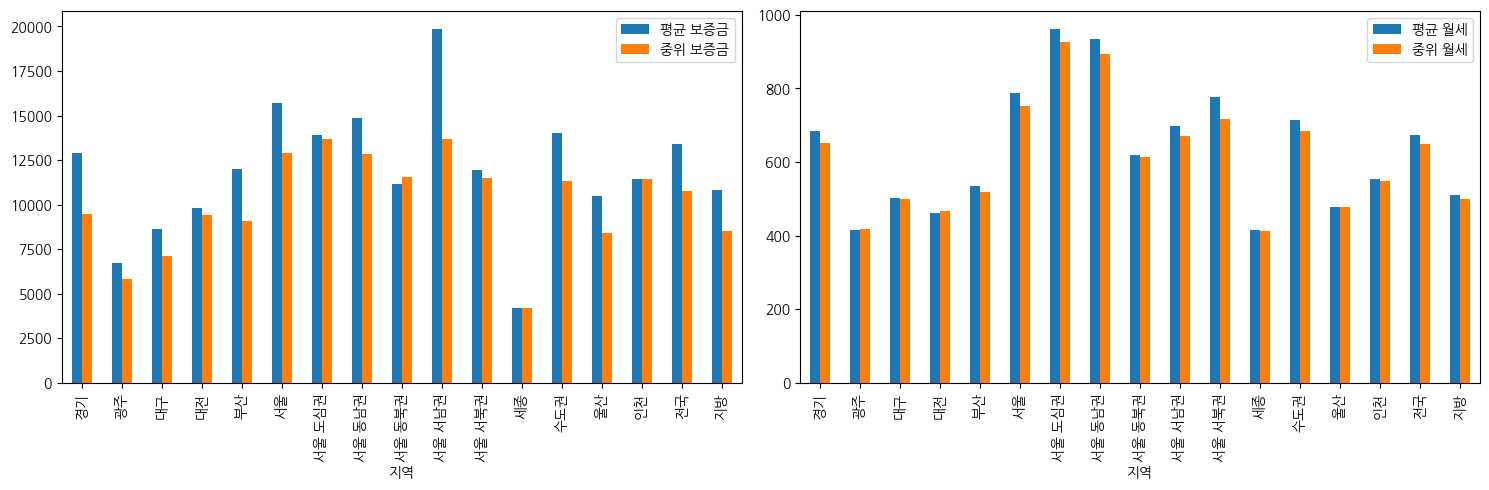

In [68]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

new1_df.plot(x='지역', y=['평균 보증금', '중위 보증금'], kind = 'bar', ax=axs[0])
new2_df.plot(x='지역', y=['평균 월세', '중위 월세'], kind = 'bar', ax=axs[1])

plt.tight_layout()
plt.show()